In [1]:
#Bibliotecas recomendadas
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Diferentes curvas paramétricas

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, expon, uniform, gamma, beta, lognorm


Text(0, 0.5, 'f(x)')

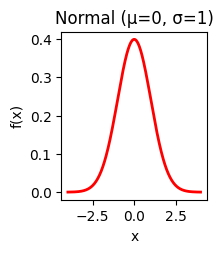

In [13]:
# Normal Distribution: μ=0, σ=1
x_norm = np.linspace(-4, 4, 400)
pdf_norm = norm.pdf(x_norm, loc=0, scale=1)

plt.subplot(2, 3, 1)
plt.plot(x_norm, pdf_norm, 'r-', lw=2)
plt.title('Normal (μ=0, σ=1)')
plt.xlabel('x')
plt.ylabel('f(x)')


Text(0.5, 0, 'x')

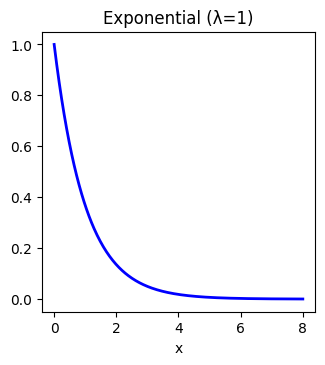

In [14]:
plt.figure(figsize=(12, 8))

# Exponential Distribution: λ=1 (scale=1/λ=1)
x_expon = np.linspace(0, 8, 400)
pdf_expon = expon.pdf(x_expon, scale=1)

plt.subplot(2, 3, 2)
plt.plot(x_expon, pdf_expon, 'b-', lw=2)
plt.title('Exponential (λ=1)')
plt.xlabel('x')



Text(0.5, 0, 'x')

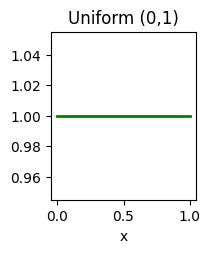

In [15]:

# Uniform Distribution: a=0, b=1
x_uniform = np.linspace(0, 1, 400)
pdf_uniform = uniform.pdf(x_uniform, loc=0, scale=1)

plt.subplot(2, 3, 3)
plt.plot(x_uniform, pdf_uniform, 'g-', lw=2)
plt.title('Uniform (0,1)')
plt.xlabel('x')



Text(0, 0.5, 'f(x)')

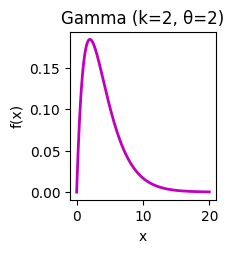

In [16]:

# Gamma Distribution: k=2, θ=2
x_gamma = np.linspace(0, 20, 400)
pdf_gamma = gamma.pdf(x_gamma, a=2, scale=2)


plt.subplot(2, 3, 4)
plt.plot(x_gamma, pdf_gamma, 'm-', lw=2)
plt.title('Gamma (k=2, θ=2)')
plt.xlabel('x')
plt.ylabel('f(x)')


Text(0.5, 0, 'x')

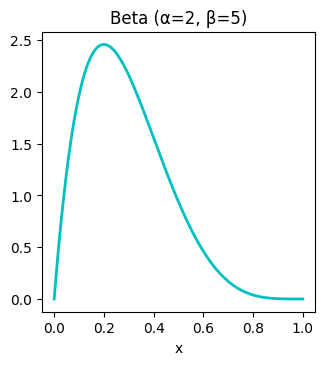

In [17]:

# Beta Distribution: α=2, β=5
x_beta = np.linspace(0, 1, 400)
pdf_beta = beta.pdf(x_beta, a=2, b=5)


plt.figure(figsize=(12, 8))


plt.subplot(2, 3, 5)
plt.plot(x_beta, pdf_beta, 'c-', lw=2)
plt.title('Beta (α=2, β=5)')
plt.xlabel('x')


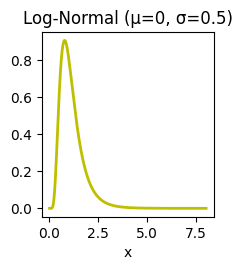

In [18]:
# Log-Normal Distribution: μ=0, σ=0.5 (Note: scale = exp(μ))
x_lognorm = np.linspace(0.01, 8, 400)
pdf_lognorm = lognorm.pdf(x_lognorm, s=0.5, scale=np.exp(0))

plt.subplot(2, 3, 6)
plt.plot(x_lognorm, pdf_lognorm, 'y-', lw=2)
plt.title('Log-Normal (μ=0, σ=0.5)')
plt.xlabel('x')

plt.tight_layout()
plt.show()


In [ ]:
morb = pd.read_csv('https://raw.githubusercontent.com/stefanomozart/estatistica_descritiva/main/dados/originais/morbidade/consolidado/consolidado.csv', low_memory=False)
display(morb.shape)

morb.rename(columns = {
    'Valor_serviços_profissionais':'val_profissionais',
    'Valor_serviços_hospitalares': 'val_hospitalares',
    'Valor_serviços_de_saúde': 'val_saude',
    'Valor_médio_intern': 'val_medio',
    'Valor_total': 'total',
    'Média_permanência': 'md_permanencia',
    'Óbitos': 'Obitos',
    'Taxa_mortalidade': 'mortalidade',
}, inplace = True)
morb.total = morb.total.str.replace(',','.').astype(float)

def toFloat(s):
    s = s.replace(',','.').replace('...','')
    try:
        return float(s)
    except:
        return pd.NA

morb.val_medio = morb.val_medio.apply(toFloat)
morb.md_permanencia = morb.md_permanencia.apply(toFloat)
morb.mortalidade = morb.mortalidade.apply(toFloat)
morb.head(2)

(96711, 21)

,Município,Internações,AIH_aprovadas,total,val_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,val_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,...,val_medio,Dias_permanência,md_permanencia,Obitos,mortalidade,mes,ano,mes_ano,cod_ibge6,Data
0,Alta Floresta D'Oeste,193,193,108779.39,"86944,43",-,-,"21834,96",-,-,...,563.62,623,3.2,3,1.55,Dez,2019,2019-12-01,110001,NaN
1,Alto Alegre dos Parecis,57,57,42379.12,"34540,82",-,-,"7838,30",-,-,...,743.49,276,4.8,1,1.75,Dez,2019,2019-12-01,110037,NaN


# Gráficos

## Scatter plot

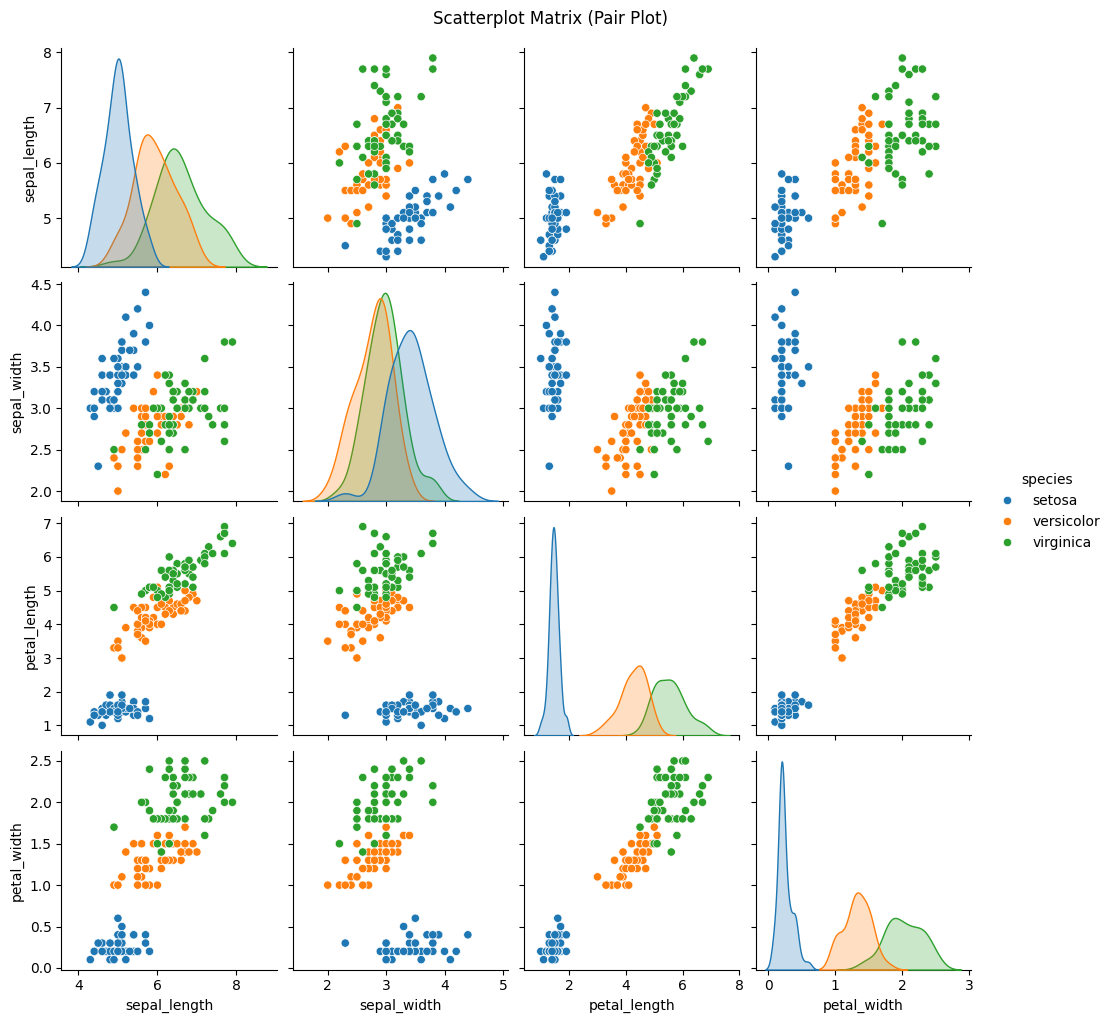

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carrega o dataset Iris
iris = sns.load_dataset("iris")

# Gera o pair plot, colorindo pelas espécies
sns.pairplot(iris, hue="species")
plt.suptitle("Scatterplot Matrix (Pair Plot)", y=1.02)
plt.show()


## Gráfico de frequência particionado

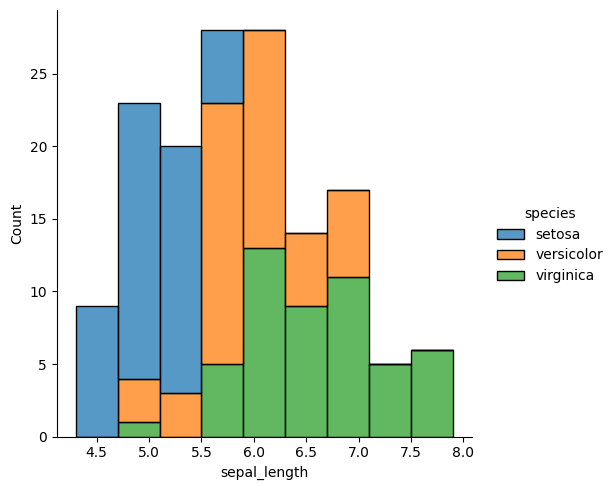

In [19]:
sns.displot(data=iris, x="sepal_length", hue="species", kind="hist", multiple="stack")

## Coordenadas paralelas

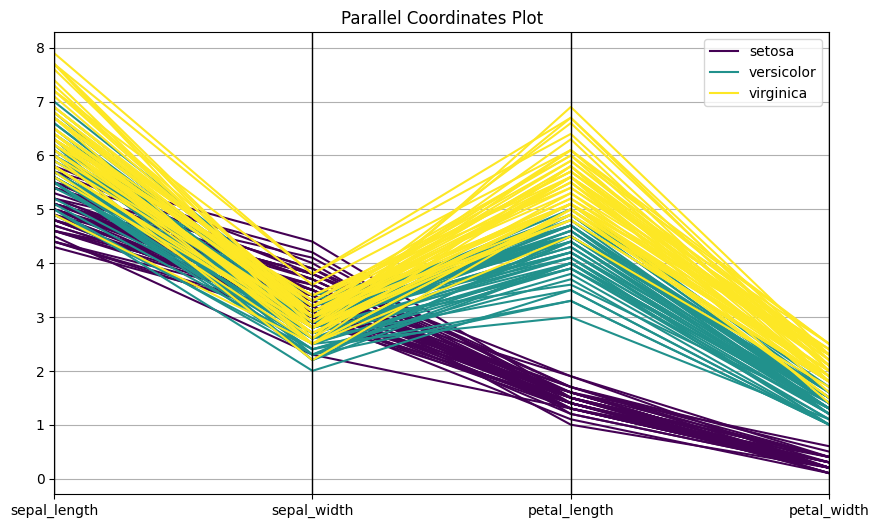

In [3]:
import pandas as pd
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10, 6))
parallel_coordinates(iris, class_column="species", colormap="viridis")
plt.title("Parallel Coordinates Plot")
plt.show()


## Biplot (PCA)

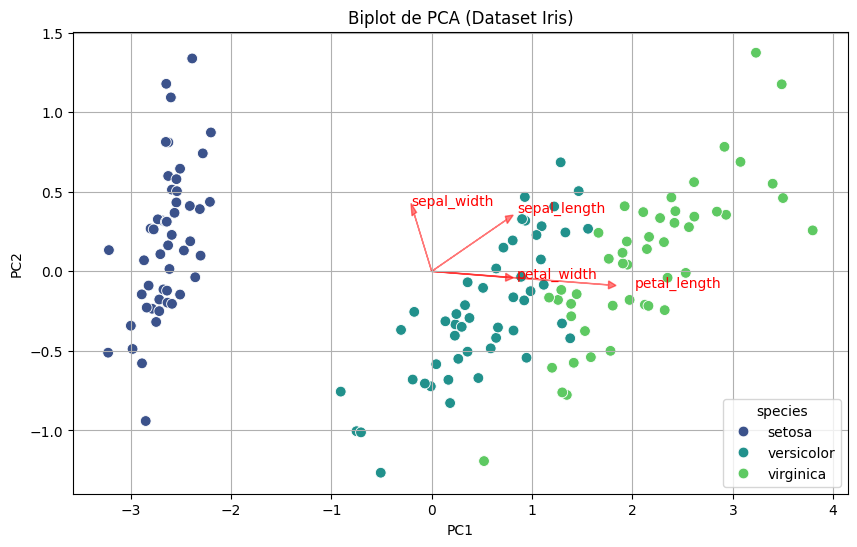

In [4]:
import numpy as np
from sklearn.decomposition import PCA

# Separa as features e a variável de classe
features = iris.drop("species", axis=1)
species = iris["species"]

# Realiza PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
components = pca.fit_transform(features)

# Cria um DataFrame com os scores da PCA
pca_df = pd.DataFrame(data=components, columns=["PC1", "PC2"])
pca_df = pd.concat([pca_df, species], axis=1)

# Plota o scatter plot dos scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PC1", y="PC2", hue="species", data=pca_df, palette="viridis", s=60)

# Calcula e plota os vetores de loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(features.columns):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color="r", alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature, color="r")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot de PCA (Dataset Iris)")
plt.grid()
plt.show()


## Heatmap

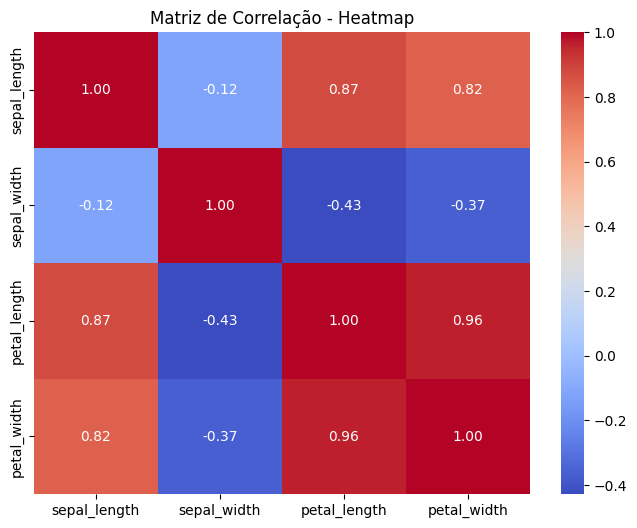

In [5]:
# Calcula a matriz de correlação das features
corr = features.corr()

# Plota o heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação - Heatmap")
plt.show()


## Violin plot

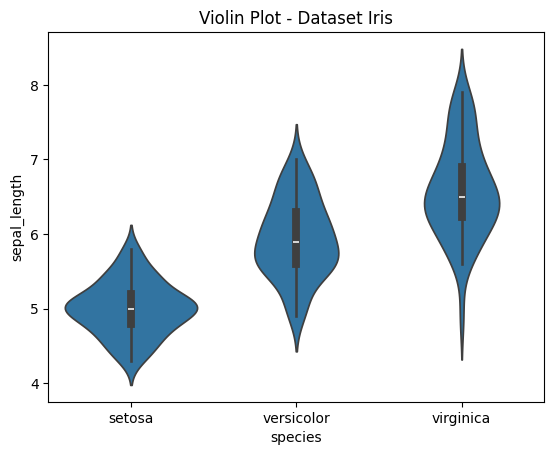

In [20]:
sns.violinplot(data=iris, x="species", y="sepal_length")
plt.title("Violin Plot - Dataset Iris")
plt.show()

## MDS

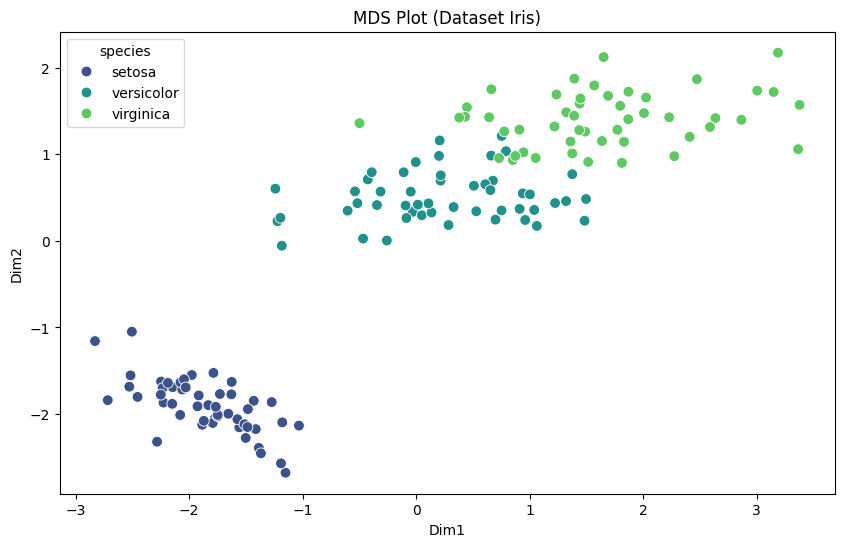

In [6]:
from sklearn.manifold import MDS

# Aplica MDS para reduzir a dimensão para 2D
mds = MDS(n_components=2, random_state=42)
mds_components = mds.fit_transform(features)

# Cria um DataFrame com as coordenadas obtidas
mds_df = pd.DataFrame(data=mds_components, columns=["Dim1", "Dim2"])
mds_df = pd.concat([mds_df, species], axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="Dim1", y="Dim2", hue="species", data=mds_df, palette="viridis", s=60)
plt.title("MDS Plot (Dataset Iris)")
plt.show()


## Radar

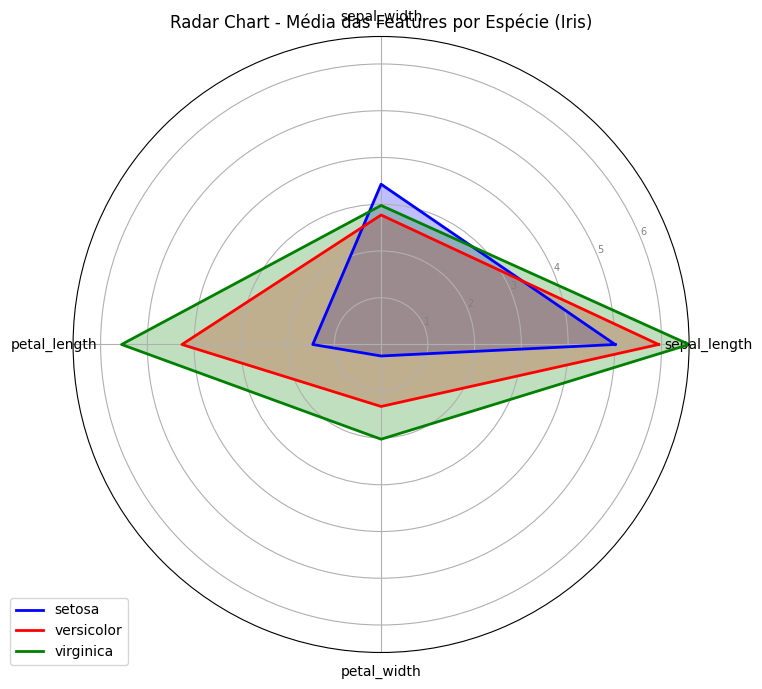

In [7]:
# Calcula a média das features por espécie
iris_grouped = iris.groupby("species").mean().reset_index()
categories = list(iris_grouped.columns[1:])  # Ignora a coluna de espécies
N = len(categories)

# Define os ângulos para cada variável
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Completa o ciclo

# Função para criar o radar chart para cada grupo
def make_radar_chart(row, color, label):
    values = iris_grouped.loc[row, categories].tolist()
    values += values[:1]
    plt.plot(angles, values, color=color, linewidth=2, label=label)
    plt.fill(angles, values, color=color, alpha=0.25)

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories)
plt.yticks(color="grey", size=7)
plt.ylim(0, max(iris_grouped[categories].max()))

colors = ["b", "r", "g"]
for idx, species_name in enumerate(iris_grouped["species"]):
    make_radar_chart(idx, colors[idx], species_name)

plt.title("Radar Chart - Média das Features por Espécie (Iris)")
plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))
plt.show()


## Scatter plot 3D

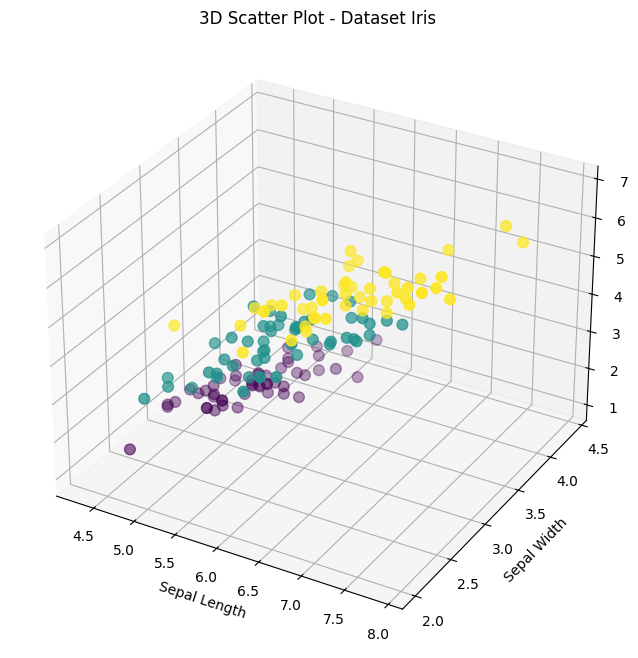

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Usaremos três features: sepal_length, sepal_width e petal_length
species_codes = iris["species"].astype("category").cat.codes
scatter = ax.scatter(iris["sepal_length"], iris["sepal_width"], iris["petal_length"],
                     c=species_codes, cmap="viridis", s=60)
ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.set_title("3D Scatter Plot - Dataset Iris")
plt.show()


# Medidas de associação
## V de Cramer

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Exemplo de dados categóricos
data = {
    'Variavel_A': ['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não'],
    'Variavel_B': ['Alto', 'Baixo', 'Médio', 'Alto', 'Baixo', 'Médio', 'Médio', 'Baixo', 'Alto', 'Médio']
}
df = pd.DataFrame(data)

# Cria a tabela de contingência
tabela = pd.crosstab(df['Variavel_A'], df['Variavel_B'])

# Aplica o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

# Número total de observações
n = tabela.values.sum()

# Número mínimo de categorias menos 1 (para linhas ou colunas)
min_dim = min(tabela.shape) - 1

# Cálculo do V de Cramer
cramers_v = np.sqrt(chi2 / (n * min_dim))
print("V de Cramer:", cramers_v)


V de Cramer: 0.2581988897471611


## Coeficiente Phi

In [2]:
# Exemplo de tabela 2x2
data_2x2 = {
    'Resultado': ['Sucesso', 'Sucesso', 'Fracasso', 'Fracasso', 'Sucesso', 'Fracasso', 'Sucesso', 'Fracasso'],
    'Grupo': ['Controle', 'Tratamento', 'Controle', 'Tratamento', 'Controle', 'Tratamento', 'Controle', 'Tratamento']
}
df2 = pd.DataFrame(data_2x2)
tabela_2x2 = pd.crosstab(df2['Resultado'], df2['Grupo'])

chi2_2x2, p_2x2, dof_2x2, expected_2x2 = chi2_contingency(tabela_2x2)
n_2x2 = tabela_2x2.values.sum()

phi = np.sqrt(chi2_2x2 / n_2x2)
print("Coeficiente Phi:", phi)


Coeficiente Phi: 0.25


## Teste Qui-Quadrado

In [3]:
chi2_val, p_val, dof_val, expected_val = chi2_contingency(tabela)
print("Teste Qui-Quadrado:")
print("  Qui-quadrado:", chi2_val)
print("  p-valor:", p_val)
print("  Graus de Liberdade:", dof_val)


Teste Qui-Quadrado:
  Qui-quadrado: 0.6666666666666666
  p-valor: 0.7165313105737892
  Graus de Liberdade: 2


## Covariância

In [4]:
# Exemplo com dados numéricos
np.random.seed(42)
data_numeric = {
    'X': np.random.rand(100),
    'Y': np.random.rand(100)
}
df_numeric = pd.DataFrame(data_numeric)

covariance = df_numeric['X'].cov(df_numeric['Y'])
print("Covariância:", covariance)


Covariância: -0.00296754879557268


## Coeficiente de Correlação de Pearson

In [5]:
from scipy.stats import pearsonr

pearson_corr, pearson_p = pearsonr(df_numeric['X'], df_numeric['Y'])
print("Coeficiente de Correlação de Pearson:", pearson_corr)
print("p-valor:", pearson_p)


Coeficiente de Correlação de Pearson: -0.034032500978822544
p-valor: 0.7367625222563704


## Coeficiente de Spearman

In [6]:
from scipy.stats import spearmanr

spearman_corr, spearman_p = spearmanr(df_numeric['X'], df_numeric['Y'])
print("Coeficiente de Correlação de Spearman:", spearman_corr)
print("p-valor:", spearman_p)


Coeficiente de Correlação de Spearman: -0.018865886588658863
p-valor: 0.8522067457716702


## Tau de Kendall

In [7]:
from scipy.stats import kendalltau

kendall_corr, kendall_p = kendalltau(df_numeric['X'], df_numeric['Y'])
print("Coeficiente Tau de Kendall:", kendall_corr)
print("p-valor:", kendall_p)


Coeficiente Tau de Kendall: -0.01575757575757576
p-valor: 0.8163103639580351


## Tau de Kendall modificado

In [8]:
# Exemplo com dados que possuem repetições
x = np.array([1, 2, 2, 3, 4, 4, 5])
y = np.array([3, 3, 4, 5, 5, 6, 7])

kendall_modified, kendall_modified_p = kendalltau(x, y)
print("Tau de Kendall modificado (tau-b):", kendall_modified)
print("p-valor:", kendall_modified_p)


Tau de Kendall modificado (tau-b): 0.8947368421052629
p-valor: 0.007573669804117922


## Coeficiente de Determinação $R²$

In [9]:
# Exemplo: regressão linear simples
import numpy as np
from sklearn.metrics import r2_score

# Dados simulados
x_reg = np.array([1, 2, 3, 4, 5])
y_reg = 2 * x_reg + np.random.normal(0, 1, len(x_reg))  # y = 2x + ruído

# Ajuste de uma reta (regressão linear) usando polyfit
coeffs = np.polyfit(x_reg, y_reg, 1)
y_pred = np.polyval(coeffs, x_reg)

# Cálculo manual do R²
ss_res = np.sum((y_reg - y_pred) ** 2)
ss_tot = np.sum((y_reg - np.mean(y_reg)) ** 2)
r2_manual = 1 - ss_res / ss_tot

# Ou usando r2_score do sklearn
r2_sklearn = r2_score(y_reg, y_pred)

print("Coeficiente de Determinação (R²) - Manual:", r2_manual)
print("Coeficiente de Determinação (R²) - sklearn:", r2_sklearn)


Coeficiente de Determinação (R²) - Manual: 0.9560985301718146
Coeficiente de Determinação (R²) - sklearn: 0.9560985301718146
